### Ayuda

[Breve ayuda de markdown](https://joedicastro.com/pages/markdown.html "markdown")

[Ayuda de Latex](https://www.codecogs.com/latex/eqneditor.php?lang=es-es)

#  Gráficas en Python


Como es natural de pensar no podemos generar en una computadora conjuntos continuos (pues necesitariamos cantidad infinita de memoria) así que si queremos general gráficas de funciones cuyo dominio es un conjunto continuo, tomamos unas muestras (un subconjunto finito lo suficientemente "bueno") y aplicamos la función, posteriormente con ayuda de la represenación visual emulamos la aplicación de la función a un conjunto infinito. Como principal ayuda para esta parte se puede consultar:

- [Documentos de matplotlib](https://matplotlib.org/contents.html) uno de los módulos escrito en Python para generar gráficas, un módulo extenso.

- [Galeria de imágenes](https://matplotlib.org/gallery/index.html) proporciona el código de las imágenes que se observan

- [Documentos de matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=plot#module-matplotlib.pyplot) submódulo de matplotlib para generar gráficas, donde se tiene una sintaxys tipo MATLAB (esto es bueno si sabes MATLAB)

- [Documento de plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) una de las descripciones que se puede encontrar en la página anterior 


In [1]:
# Cargar módulos correspondientes
import matplotlib.pyplot as plt #


#Principio básico del plot
x=[1,2,3]
y=[5,6,7]
plt.plot(x,y)
plt.grid()
plt.title(r'Funcion $f(x)=x+4$', fontsize=20)
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de y')
plt.show()
plt.plot(x,y,'ro')
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Se complica la generación de listas y sobre todo manipular y aplicar funciones a cada uno de los elementos (uso de ciclos), numpy nos porporciona un tipo de dato que se llama **array** el cual junto con las funciones matemáticas de numpy permite un uso directo de las evaluaciones de funciones a todos los elementos del **array**. El módulo es extenso y contiene submódulos al igual que *matplotlib* con diferentes herramientas matemáticas. La ayuda se puede encontrar en el siguiente enlace

-[Documentos de numpy](https://www.numpy.org/devdocs/reference/) Manual del módulo numpy. 

Se generarán las gráficas de las siguientes funciones en el intervalo infdicado 

$$f_1(x)=e^{-0.5x}cos(3x),\;\;\text{ para }-2\leq x\leq 10$$

$$f(x)=\begin{cases}
0,&\text{si }x<0\\
\frac{2}{9}x,&\text{si }0\leq x <3\\
0,&\text{ si }3\leq x
\end{cases};\;\;\text{ para }-4\leq x\leq 5$$

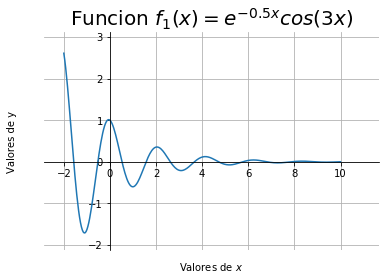

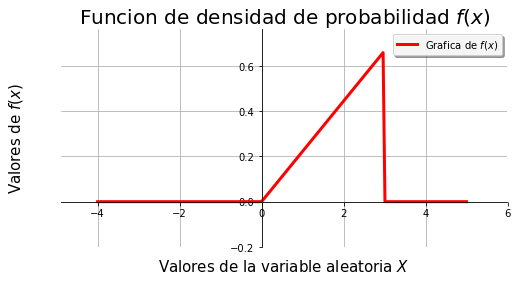

In [2]:
# Cargar módulos correspondientes
import numpy as np 


### Ejemplo 1

x=np.linspace(-2,10,300)
y=np.exp(-0.5*x)*np.cos(3*x)
plt.plot(x,y)
plt.grid()
plt.title(r'Funcion $f_1(x)=e^{-0.5x}cos(3x)$', fontsize=20)
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de y')
ax = plt.gca()
ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.08,0.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
xlim=ax.get_xlim()
ylim=ax.get_ylim()
ax.set_xlim(min(xlim[0]*(0.9),xlim[0]*(1.1)),max(xlim[1]*1.1,xlim[1]*0.9))
ax.set_ylim(min(ylim[0]*(0.9),ylim[0]*(1.1)),max(ylim[1]*1.1,ylim[1]*0.9))
plt.show()

#Ejemplo 2

x = np.linspace(-4, 5, 200)
y=np.piecewise(x, [x < 0, (0<=x) & (x<3), x>3 ], [0,lambda x: (2.0/9.0)*x,0])
fig=plt.figure(figsize=(8,4))#
ax=plt.axes()
ax.plot(x,y,c='r',lw=3,label=r'Grafica de $f(x)$')
ax.grid()
ax.set_xlabel('Valores de la variable aleatoria $X$',fontsize=15)
ax.set_ylabel('Valores de $f(x)$',fontsize=15)
ax.set_title('Funcion de densidad de probabilidad $f(x)$',fontsize=20)
leg = plt.legend(loc='best', shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.9)
ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.08,0.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
xlim=ax.get_xlim()
ylim=ax.get_ylim()
ax.set_xlim(min(xlim[0]*(0.9),xlim[0]*(1.1)),max(xlim[1]*1.1,xlim[1]*0.9))
ax.set_ylim(-0.2,max(ylim[1]*1.1,ylim[1]*0.9))
plt.show()

##   Función de densidad $f(x)$ VA continuas  

- $P(X\in[a,b])=\int_a^b f(x) dx $
- $f(x)\geq 0$
- $\int\limits_{-\infty}^\infty f(x)=1$

Como se puede observar generar una gráfica con un "buen" formato implica editar varias caracteristicas, así que será una buena práctica generar funciones para gráficar de manera automática. A continuación cargamos el módulo donde se ha programado la función en cuestión, el nombre es **gfdvac** (**g**ráfica **f**unción **d**ensidad **v**ariable **a**leatoria **c**ontinua)

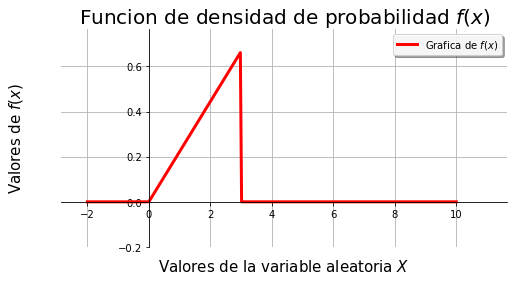

In [3]:
#Cargamos el modulo 
from ProgramasProba.Proba import *

#Para el ejemplo anterior

def fejemplo2(x):
    return np.piecewise(x, [x < 0, (0<=x) & (x<3), x>3 ],\
                        [0,lambda x: (2.0/9.0)*x,0])


gfdvac((-2,10),fejemplo2)

##  Función de distribución (acumulada) $F(x)$ VA continuas  

- $F(X\leq x)=P(X\in(-\infty,x])=\int\limits_{-\infty}^x f(x) dx $
- $f(x)=\frac{dF(x)}{dx}$

Se ha generado una función, gFdfvac (**g**ráfica **F**(x) **d**istribución de **f** **v**ariable **a**leatoria **c**ontinua ) que esta contenida en el módulo previamente cargado (ProgramasProba), que calcula $F(x)$ de manera númerica (método númerico para integrar $f(x)$ y obtener $F(x)$), el método (función quad) se encuentra en el submódulo *Integrate* del módulo *Scipy* de Python. Se obtiene la grafica de $F(x)$ a partir de conocer $f(x)$.

-[Documento Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html). Módulo para computación cientifica compatible con Numpy, Scipy, Matplotlib, entre otros 


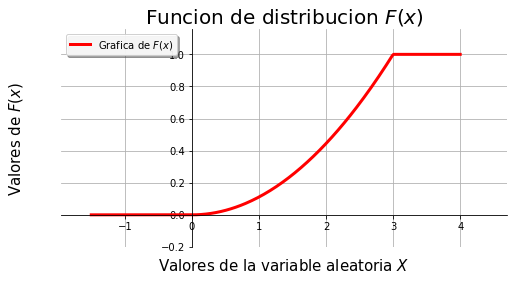

In [4]:
gFdfvac((-1.5,4),fejemplo2)

En Desmos se pueden crear animaciones para observar el significado de $F(x)$, la sigeuinte animación puede ser modificada para obtener un resultado especifico.  

In [5]:
from IPython.display import IFrame
IFrame("https://www.desmos.com/calculator/2353iil0hl", width='100%', height=500)

 ### Funciones de probabilidad  $f(x)$ (función de masa de probabilidad) VA discretas

- $P(X=x)=f(x)$
- $f(x)\geq 0$
- $\sum\limits_{x}f(x)=1$

Se muestra la idea para implementar funciones con estas gráficas 

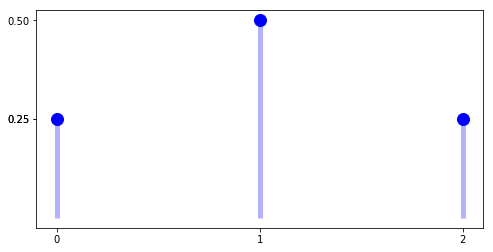

In [6]:
X=np.array([0,1,2])
f=np.array([0.25,0.5,0.25])

tam_marcador=12
marcador='o'
fig=plt.figure(figsize=(8,4))
ax=plt.axes()

ax.plot(X,f,'bo',ms=tam_marcador)
ax.vlines(X, [0], f,colors='b', lw=5, alpha=0.3)
plt.xticks(X)
plt.yticks(f)

X=np.array([0,1,2])
f=np.array([0.25,0.5,0.25])

Se utiliza la función **gfpvad** (**grafica** **f**uncion de **p**robabilidad **v**ariable **a**leatoria **d**iscreta) cuyos datos son los valores de la variable aleatoria **X** en formato de array, y sus correspondientes valores de probabiidad **f**, tambien en formato de array. Esta función se encuetra en el modulo importado. 

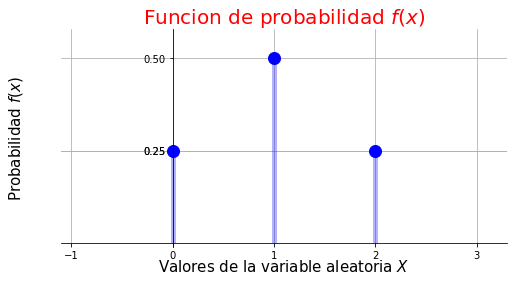

In [7]:
X=np.array([0,1,2])
f=np.array([0.25,0.5,0.25])

gfpvad(X,f)
#guardar=True


##  Función de distribución (acumulada) $F(x)$ VA discretas  

- $F(X\leq x)=P(X\in(-\infty,x])=\sum\limits_{u\leq x} f(u)$
- $f(x)=F(x)-F(x^{-})$

Se ha generado una función, gFdfvac (**g**ráfica **F**(x) **d**istribución de **f** **v**ariable **a**leatoria **d**iscreta) que esta contenida en el módulo previamente cargado (ProgramasProba). Se obtiene la grafica de $F(x)$ a partir de conocer  $X$ y $f(x)$ en sus formatos de array.

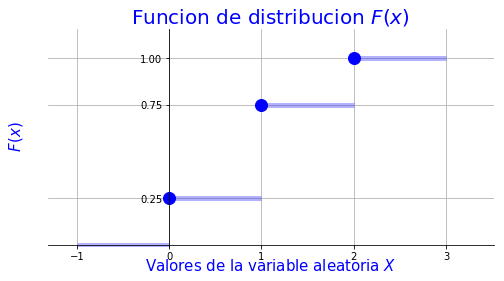

In [8]:
X=np.array([0,1,2])
f=np.array([0.25,0.5,0.25])

gFdfvad(X,f)

## Descripción de módulo stats

La mayor parte de la información es puede encontrar en [scipy módulo stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [10]:
from scipy import stats # importando scipy.stats

# Variables aleatorias discretas
[Notación de scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html)

- *pmf(x)* (Probability Mass Function) Función de densidad $f(x)=F(x)-F(x^{-})$ 
- *cdf(x)* (Cumulative Distribution Function) Funcion de distribución $F(x)$
- *ppf(x)* (Percent Point Function) Función inversa a cdf(x) $G(q)=F^{-1}(q)$


[Distribuciones discretas](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-distributions-in-scipy-stats)

## Distribución uniforme discreta

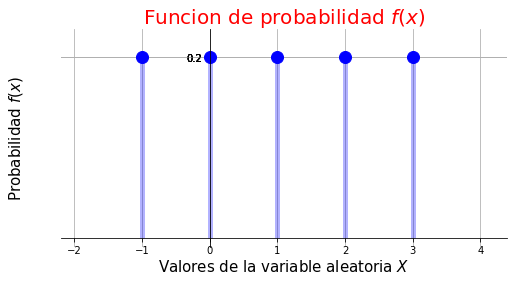

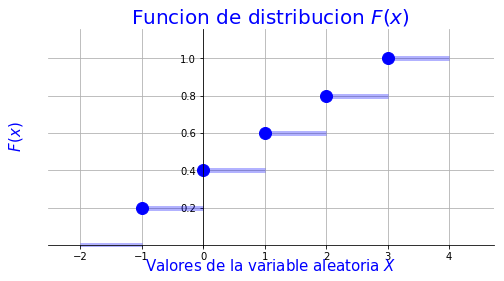

In [11]:
X=np.array(range(-1,4))
vduniforme=stats.randint(low=-1,high=4)
f=vduniforme.pmf(X)
gfpvad(X,f)
gFdfvad(X,f)


## Distribución Bernoulli  (es discreta)

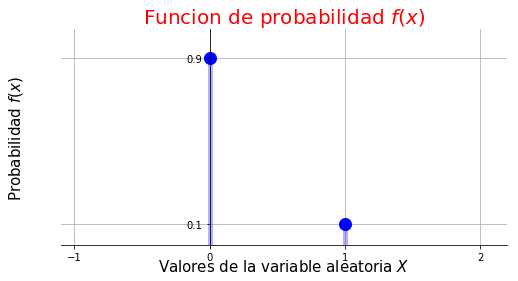

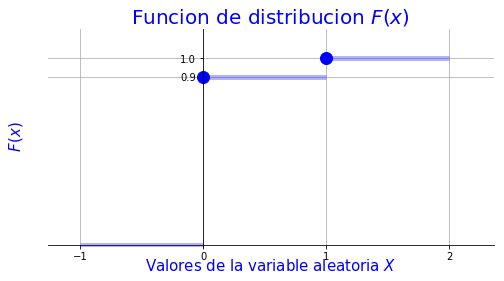

In [27]:
X=np.array([0,1])
vdbernoulli=stats.bernoulli(p=0.1)
f=vdbernoulli.pmf(X)
gfpvad(X,f)
gFdfvad(X,f)

## Distribución binomial  (es discreta)

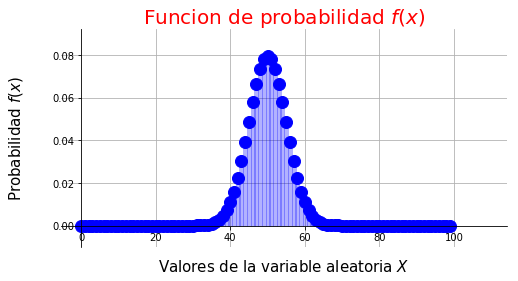

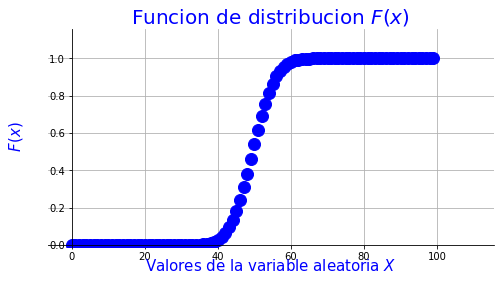

In [26]:
X=np.array(range(0,100))
vdbinom=stats.binom(n=100,p=0.5)
f=vdbinom.pmf(X)
gfpvad(X,f,etiquetas=False)
gFdfvad(X,f,etiquetas=False)

## Distribución geométrica  (es discreta)

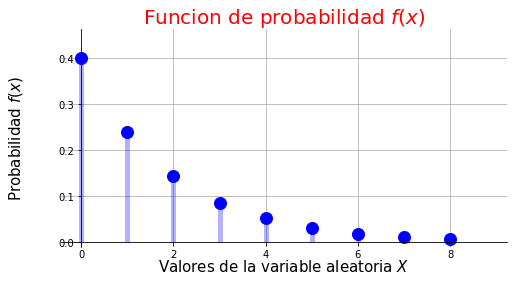

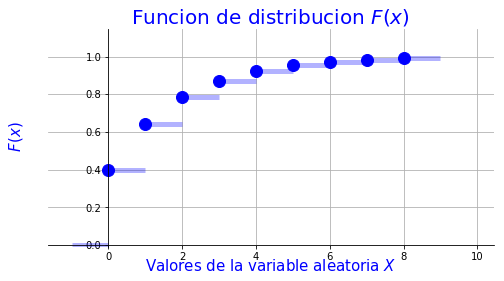

In [46]:
X=np.array(range(1,10))
#la X esta desplazada a la derecha
vdgeom=stats.geom(p=0.4)
f=vdgeom.pmf(X)
gfpvad(X-1,f,etiquetas=False)
gFdfvad(X-1,f,etiquetas=False)

## Distribución binomial negativa  (es discreta)

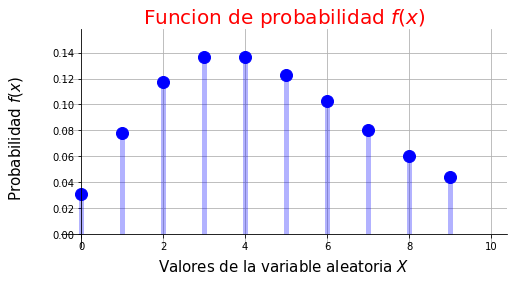

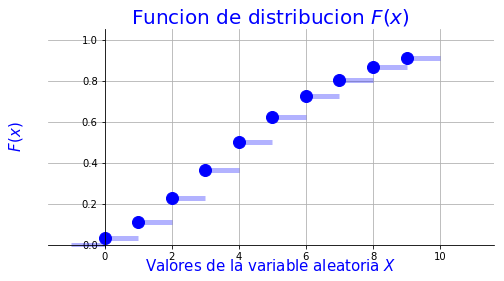

In [42]:
X=np.array(range(0,10))
#n=r
vdnbinom=stats.nbinom(n=5,p=0.5)
f=vdnbinom.pmf(X)
gfpvad(X,f,etiquetas=False)
gFdfvad(X,f,etiquetas=False)

## Distribución hipergeométrica  (es discreta)

[0.08301084 0.32281992 0.3873839  0.17608359 0.02934727 0.00135449]


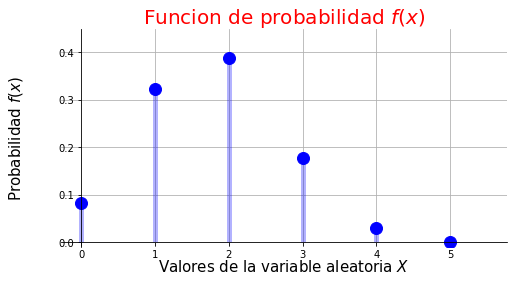

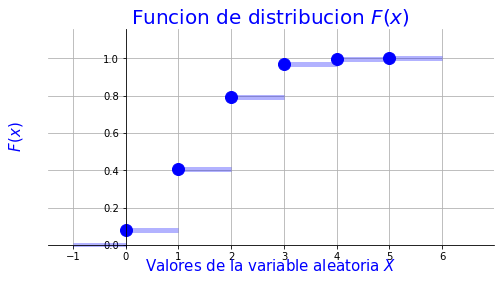

In [41]:
X=np.array(range(0,6))
#M=N, n=K, N=n.  
vdhypergeom=stats.hypergeom(M=20, n=7,N=5)
f=vdhypergeom.pmf(X)
gfpvad(X,f,etiquetas=False)
gFdfvad(X,f,etiquetas=False)

## Distribución Poisson  (es discreta)

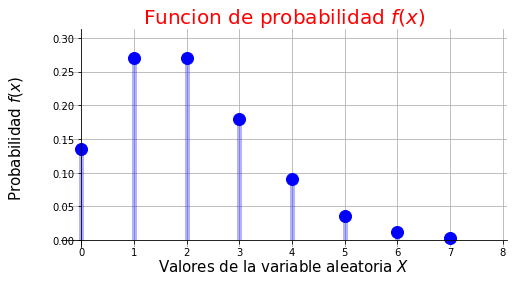

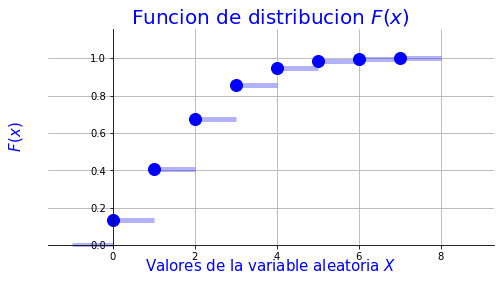

In [45]:
X=np.array(range(0,8))
vdpoisson=stats.poisson(mu=2)
f=vdpoisson.pmf(X)
gfpvad(X,f,etiquetas=False)
gFdfvad(X,f,etiquetas=False)

## Variables aleatorias continuas

[Notación de scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html)

- *pdf(x)* (Probability Density Function) Función de densidad $f(x)=F'(x)$ 
- *cdf(x)* (Cumulative Distribution Function) Funcion de distribución $F(x)$
- *ppf(x)* (Percent Point Function) Función inversa a cdf(x) $G(q)=F^{-1}(q)$


[Distribuciones continuas](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-distributions-in-scipy-stats)



In [14]:
from scipy import stats # importando scipy.stats
va = stats.uniform(loc=0,scale=12)
print va.mean()

6.0


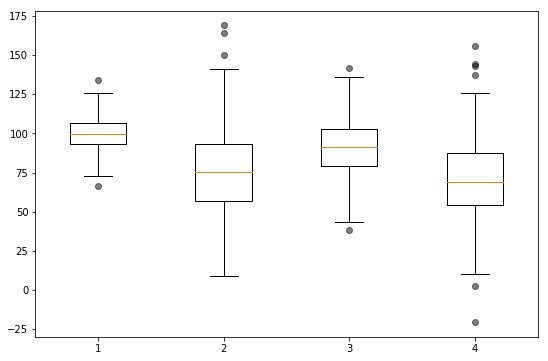

In [15]:
from scipy import stats # importando scipy.stats
import seaborn as sns # importando seaborn

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos
plt.show()

#print stats.norm.__doc__
#dir(stats.norm())
#dir(stats)

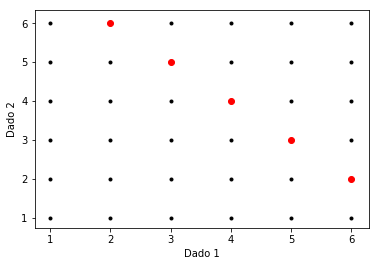

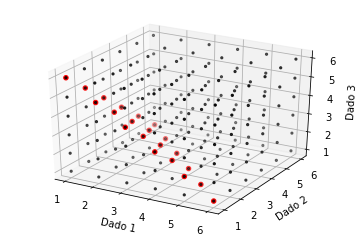

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

suma=8
a1=[];
c1=[];
a2=[];
c2=[];
a3=[];
c3=[];


for i in range(1,7):
    a1.append(np.array([i]))
    if np.array([i]).sum()==suma:
        c1.append(np.array([i]))
    for j in range(1,7):
        a2.append(np.array([i,j]))
        if np.array([i,j]).sum()==suma:
            c2.append(np.array([i,j])) 
        for k in range(1,7):
            a3.append(np.array([i,j,k]))
            if np.array([i,j,k]).sum()==suma:
                c3.append(np.array([i,j,k]))      

a1=np.array(a1)                
c1=np.array(c1)
a2=np.array(a2)                
c2=np.array(c2)
a3=np.array(a3)                
c3=np.array(c3)


#print c2.shape, a2.shape
#print c3.shape, a3.shape

fig2 = plt.figure()
ax2 = fig2.gca()
ax2.scatter(a2[:,0],a2[:,1], c='k',marker='.')
ax2.scatter(c2[:,0],c2[:,1], c='r')

ax2.set_xlabel('Dado 1')
ax2.set_ylabel('Dado 2')
plt.show() 


fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')
ax3.scatter(a3[:,0],a3[:,1], a3[:,2], c='k',marker='.')
ax3.scatter(c3[:,0],c3[:,1], c3[:,2], c='r')



ax3.set_xlabel('Dado 1')
ax3.set_ylabel('Dado 2')
ax3.set_zlabel('Dado 3')
plt.show()  

In [17]:
TS8=(1/3.0)*(5/36.0)+(1/3.0)*(21/216.0)
TS8*100

7.870370370370369

In [18]:
C8T2=(1/3.0)*(5/36.0)/((1/3.0)*(5/36.0)+(1/3.0)*(21/216.0))
C8T2

0.5882352941176471

In [9]:
from scipy.special import perm, comb
res = perm(10, 3)
print res
res = comb(10, 3)
print res

720.0
120.0
